### Data Classification

In [1]:
import pandas as pd
import numpy as np
import pickle
from classifiers.features import Features
from classifiers.svm import SVM
from classifiers.knn import KNN
from classifiers.rfc import RFC

dataframe = pd.read_csv('./data/dataframe.csv')
features = Features(dataframe)

svm_classifier = SVM()
# svm_params = dict(gamma=np.logspace(-9, 3, 3), C=np.logspace(-2, 10, 3))
svm_params = dict(gamma=[1.0], C=[10.0])
svm_classifier.train_models(svm_params, features)

knn_classifier = KNN()
knn_params = dict(n_neighbors=[3, 5, 11, 19],
                  weights=['uniform', 'distance'],
                  metric=['euclidean', 'manhattan'])
knn_classifier.train_models(knn_params, features)

rfc_classifier = RFC()
rfc_params = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
rfc_params = { 
    'n_estimators': [200],
    'max_features': ['auto'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['entropy']
}
rfc_classifier.train_models(rfc_params, features)

Reading SVM with TF. Model
Model loaded in: @ 0 seconds
-------------------------------------------------------------------------------------------
Reading SVM with TF of 100 sexist words. Model
Model loaded in: @ 0 seconds
-------------------------------------------------------------------------------------------
Reading SVM with TF of 100 not sexist words. Model
Model loaded in: @ 0 seconds
-------------------------------------------------------------------------------------------
Reading SVM with Char quantity. Model
Model loaded in: @ 0 seconds
-------------------------------------------------------------------------------------------
Reading SVM with Word quantity. Model
Model loaded in: @ 0 seconds
-------------------------------------------------------------------------------------------
Reading SVM with Likes quantity. Model
Model loaded in: @ 0 seconds
-------------------------------------------------------------------------------------------
Reading SVM with Dislikes quantity

### Classification Report

In [2]:
svm_classifier.report_results(features)

>>>> SVM with TF results
		 sexist 	 not-sexit
precision	 0.99766 	 0.91856
recall		 0.91929 	 0.99765
f1		 0.95683 	 0.95643

>>>> SVM with TF to 100 sexist words results
		 sexist 	 not-sexit
precision	 0.97531 	 0.86193
recall		 0.85750 	 0.97608
f1		 0.91256 	 0.91542

>>>> SVM with TF to 100 not sexist words results
		 sexist 	 not-sexit
precision	 0.83160 	 0.94887
recall		 0.96143 	 0.78588
f1		 0.89175 	 0.85958

>>>> SVM with Likes quantity results
		 sexist 	 not-sexit
precision	 0.58900 	 0.56886
recall		 0.65750 	 0.49608
f1		 0.62127 	 0.52982

>>>> SVM with Disikes quantity results
		 sexist 	 not-sexit
precision	 0.60660 	 0.56897
recall		 0.60929 	 0.56588
f1		 0.60769 	 0.56714

>>>> SVM with Likes and Disikes quantity results
		 sexist 	 not-sexit
precision	 0.74964 	 0.67527
recall		 0.66893 	 0.75490
f1		 0.70689 	 0.71279

>>>> SVM with Char quantity results
		 sexist 	 not-sexit
precision	 0.67145 	 0.66840
recall		 0.72393 	 0.61059
f1		 0.69653 	 0.63792

>>>> S

In [3]:
#knn_classifier.report_results(features)

In [4]:
#rfc_classifier.report_results(features)

Feature ranking:
1. feature 1 (0.420989)
2. feature 0 (0.230041)
3. feature 2 (0.176660)
4. feature 3 (0.172309)


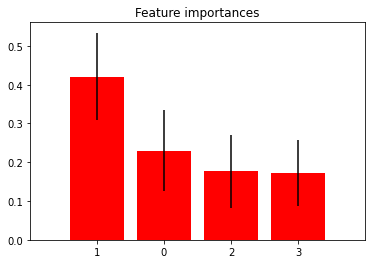

In [11]:
rfc_classifier.get_feature_importances(rfc_classifier.model_likes_dislikes_chars_words_qty, features.likes_dislike_char_words, features.y)

In [6]:
rfc_classifier.model_tf.best_estimator_.feature_importances_

array([6.12403766e-04, 3.82035479e-05, 2.97082162e-05, 3.62356866e-05,
       2.21464614e-02, 1.61915837e-04, 2.90001404e-03, 3.29249933e-04,
       3.52812336e-04, 3.45090772e-05, 6.62104592e-07, 1.36475323e-04,
       3.90852635e-02, 2.36337762e-06, 1.30619008e-04, 1.70167118e-04,
       1.60903171e-01, 6.94938304e-03, 1.68028351e-04, 2.77054088e-05,
       7.66828943e-02, 5.61859898e-06, 6.51147814e-05, 4.19573138e-02,
       8.09932340e-04, 0.00000000e+00, 5.93010623e-03, 1.15607726e-04,
       1.32520165e-04, 2.96252308e-05, 3.92964870e-04, 5.75028524e-03,
       4.19686277e-04, 8.15860150e-05, 2.38103953e-04, 1.00255643e-03,
       3.88851811e-05, 1.04675643e-04, 2.43354974e-06, 1.87728105e-05,
       3.82646561e-04, 5.14523025e-05, 1.43389820e-03, 7.35782801e-06,
       6.12668114e-05, 3.63160242e-05, 1.40780225e-03, 1.09777260e-04,
       0.00000000e+00, 1.47048980e-04, 2.34533958e-04, 4.68017398e-04,
       1.17271021e-03, 1.22398609e-04, 4.04070587e-03, 2.27988906e-04,
      